In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
brickname = '1176p300'
field = 'south'

In [4]:
tractor_fn = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/tractor/{}/tractor-{}.fits'.format(field, brickname[:3], brickname, brickname)
cat = Table(fitsio.read(tractor_fn))
print(len(cat))

mask = cat['brick_primary']
cat = cat[mask]
print(len(cat))

ra, dec = cat['ra'], cat['dec']
bx, by = cat['bx'], cat['by']

5552
5389


In [5]:
nexp_g_fn = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/coadd/{}/{}/legacysurvey-{}-nexp-g.fits.fz'.format(field, brickname[:3], brickname, brickname)
nexp_r_fn = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/coadd/{}/{}/legacysurvey-{}-nexp-r.fits.fz'.format(field, brickname[:3], brickname, brickname)
nexp_z_fn = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/coadd/{}/{}/legacysurvey-{}-nexp-z.fits.fz'.format(field, brickname[:3], brickname, brickname)
maskbits_fn = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/coadd/{}/{}/legacysurvey-{}-maskbits.fits.fz'.format(field, brickname[:3], brickname, brickname)

In [6]:
nexp_g = fitsio.read(nexp_g_fn)
nexp_r = fitsio.read(nexp_r_fn)
nexp_z = fitsio.read(nexp_z_fn)
maskbits = fitsio.read(maskbits_fn)

# # Sanity check of bx, by
# hdulist = fits.open(maskbits_fn)
# w = wcs.WCS(hdulist[1].header)
# coadd_x, coadd_y = w.wcs_world2pix(ra, dec, 0)
# print(np.max(np.abs(coadd_x-bx)), np.max(np.abs(coadd_y-by)))
# coadd_x, coadd_y = np.round(coadd_x).astype(int), np.round(coadd_y).astype(int)  # rounding before converting to integers
# print(coadd_x, coadd_y)

In [7]:
bx, by = np.round(bx).astype(int), np.round(by).astype(int)

In [8]:
n_g, n_r, n_z = nexp_g[by, bx], nexp_r[by, bx], nexp_z[by, bx]
mb = maskbits[by, bx]

In [9]:
mask = cat['nobs_g']<n_g
print(np.sum(mask), np.sum(mask)/len(mask))
mask = cat['nobs_g']>n_g
print(np.sum(mask), np.sum(mask)/len(mask))

mask = cat['nobs_r']<n_r
print(np.sum(mask), np.sum(mask)/len(mask))
mask = cat['nobs_r']>n_r
print(np.sum(mask), np.sum(mask)/len(mask))

mask = cat['nobs_z']<n_z
print(np.sum(mask), np.sum(mask)/len(mask))
mask = cat['nobs_z']>n_z
print(np.sum(mask), np.sum(mask)/len(mask))

0 0.0
202 0.03748376322137688
0 0.0
232 0.04305065874930414
0 0.0
239 0.044349601039153835


In [10]:
mask = cat['maskbits']!=mb
print(np.sum(mask), np.sum(mask)/len(mask))

0 0.0


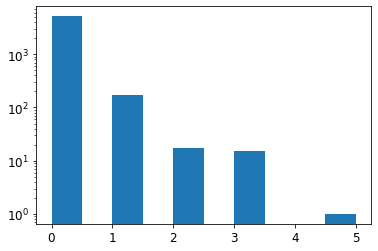

In [11]:
plt.hist(cat['nobs_g']-n_g, log=True);

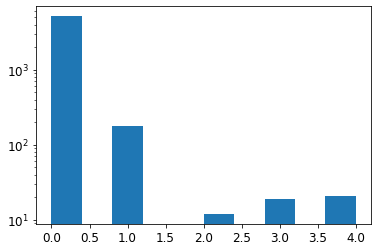

In [12]:
plt.hist(cat['nobs_r']-n_r, log=True);

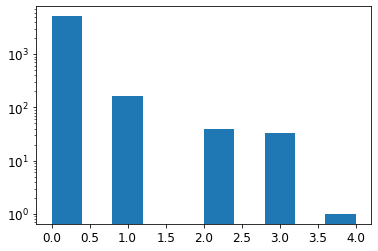

In [13]:
plt.hist(cat['nobs_z']-n_z, log=True);

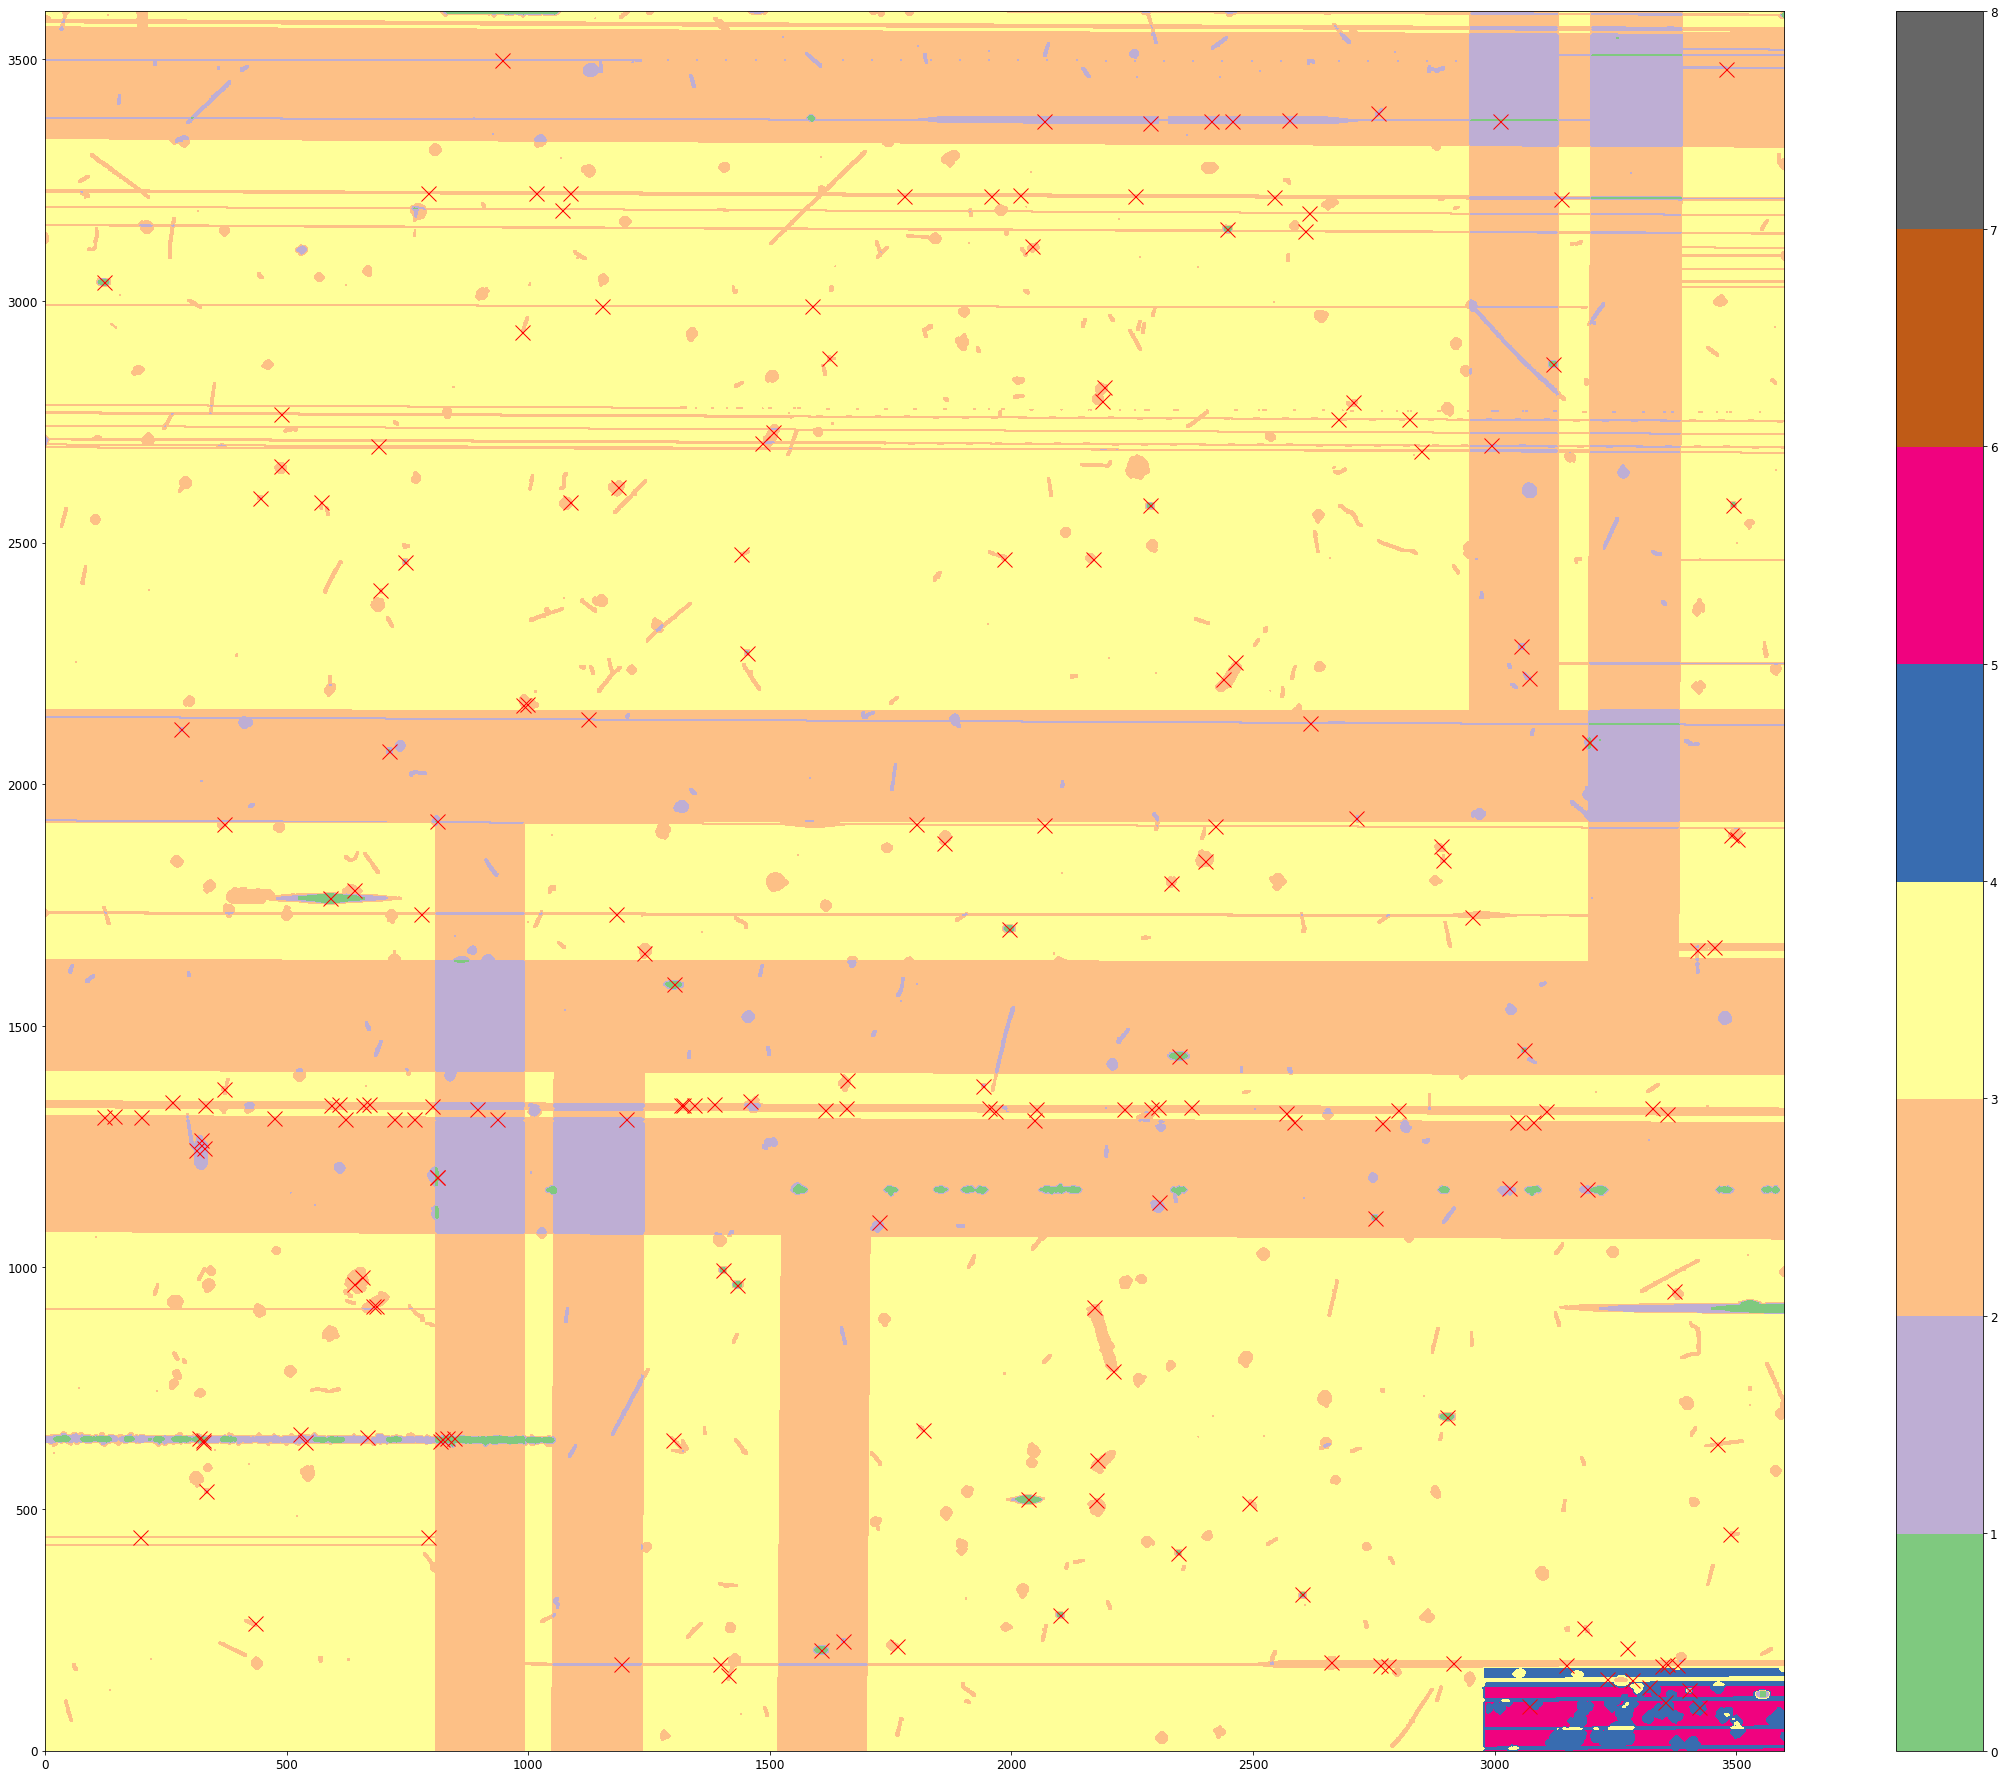

In [14]:
mask = cat['nobs_g']!=n_g

plt.figure(figsize=(40, 32))
plt.imshow(nexp_g, origin='lower', vmin=0, vmax=8, cmap='Accent')
plt.plot(bx[mask], by[mask], 'x', color='r', ms=15)
plt.colorbar()
plt.show()

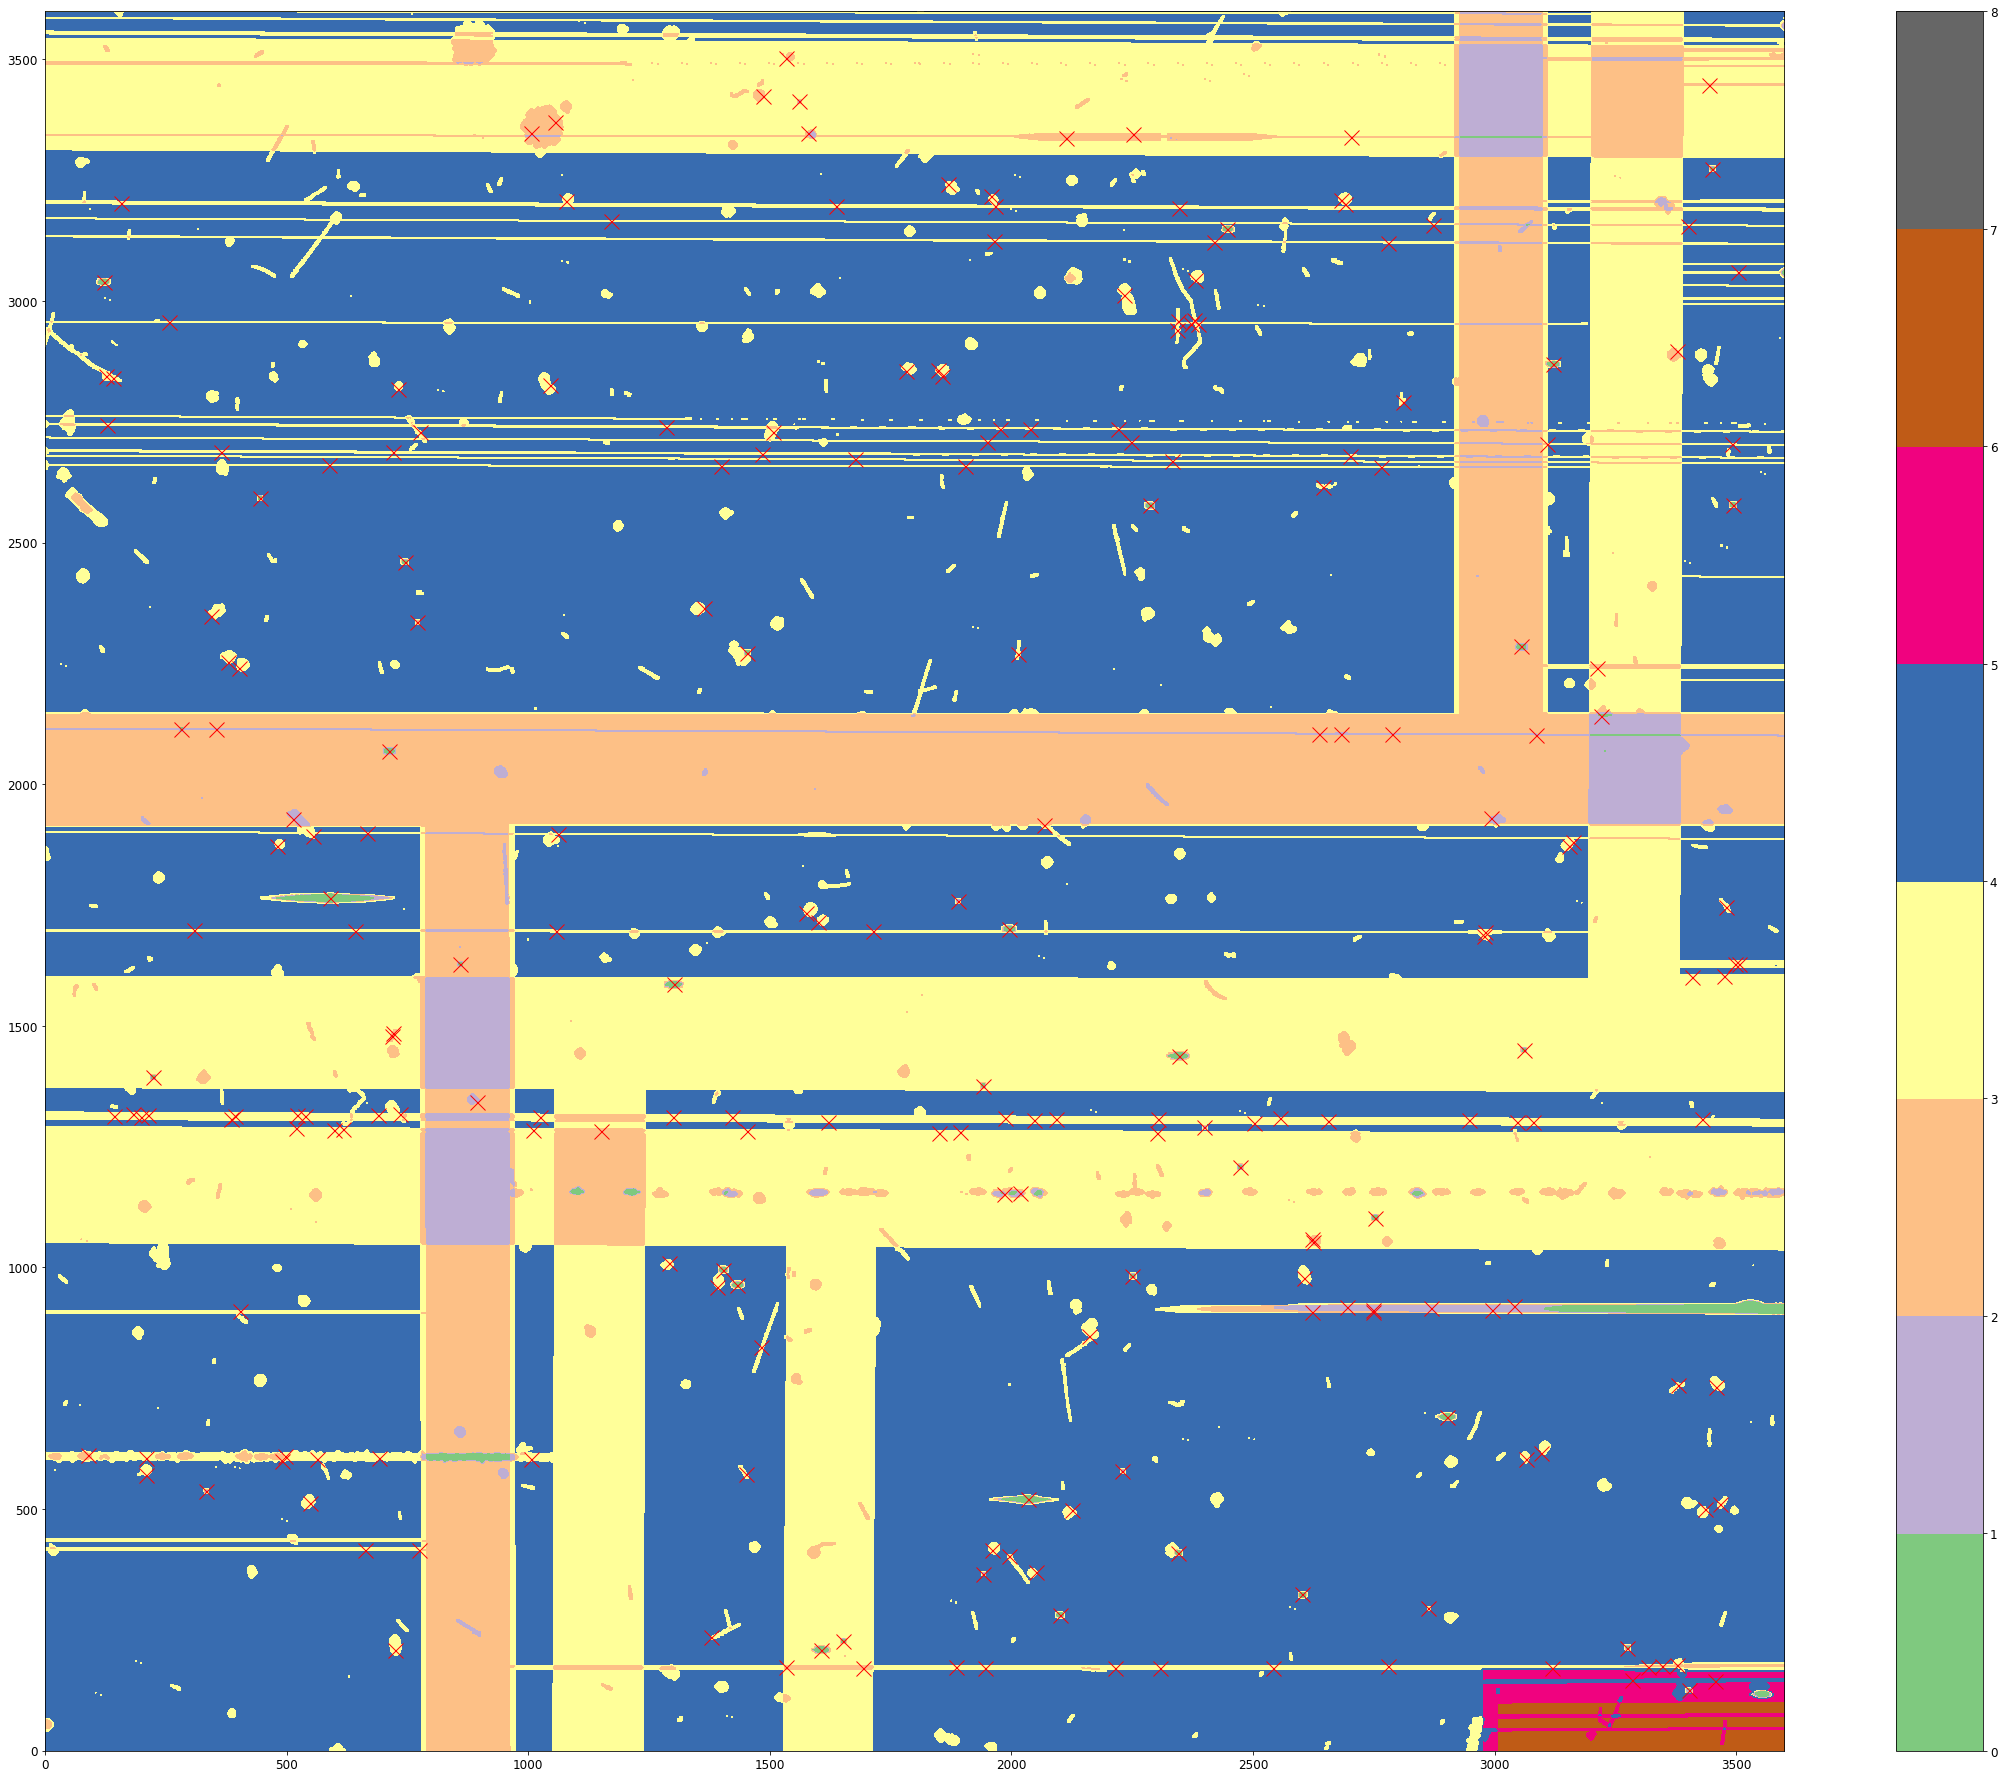

In [15]:
mask = cat['nobs_r']!=n_r

plt.figure(figsize=(40, 32))
plt.imshow(nexp_r, origin='lower', vmin=0, vmax=8, cmap='Accent')
plt.plot(bx[mask], by[mask], 'x', color='r', ms=15)
plt.colorbar()
plt.show()

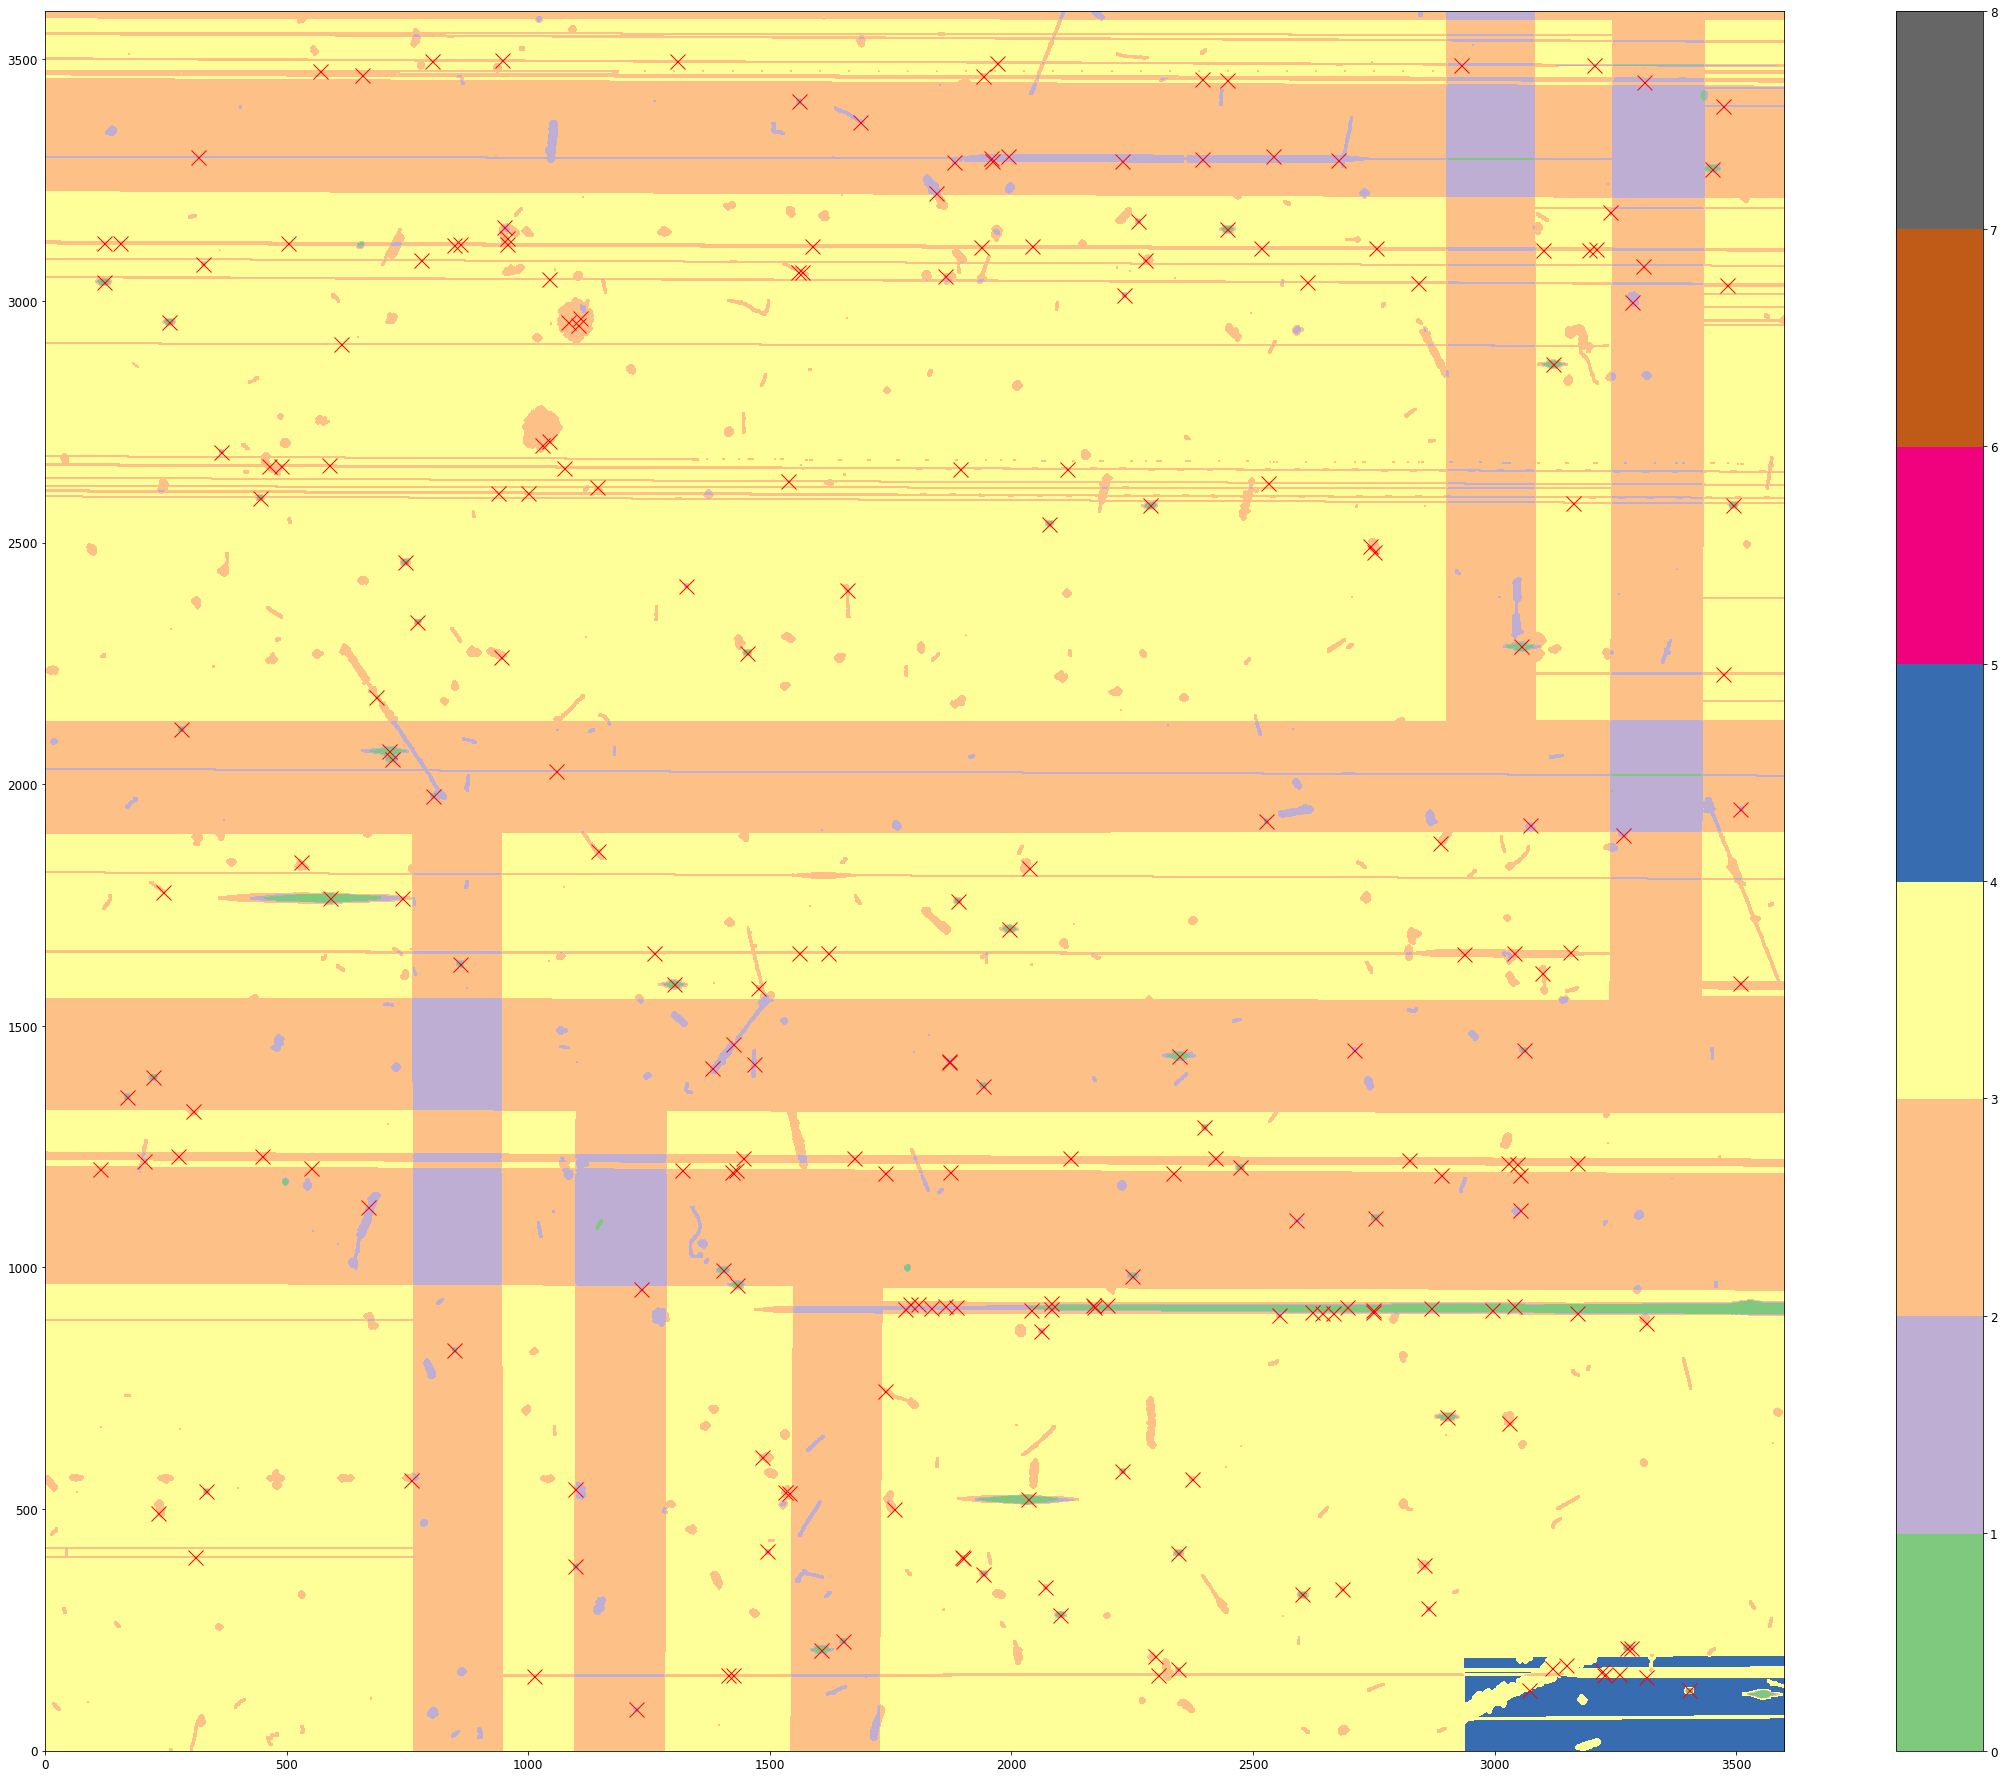

In [16]:
mask = cat['nobs_z']!=n_z

plt.figure(figsize=(40, 32))
plt.imshow(nexp_z, origin='lower', vmin=0, vmax=8, cmap='Accent')
plt.plot(bx[mask], by[mask], 'x', color='r', ms=15)
plt.colorbar()
plt.show()

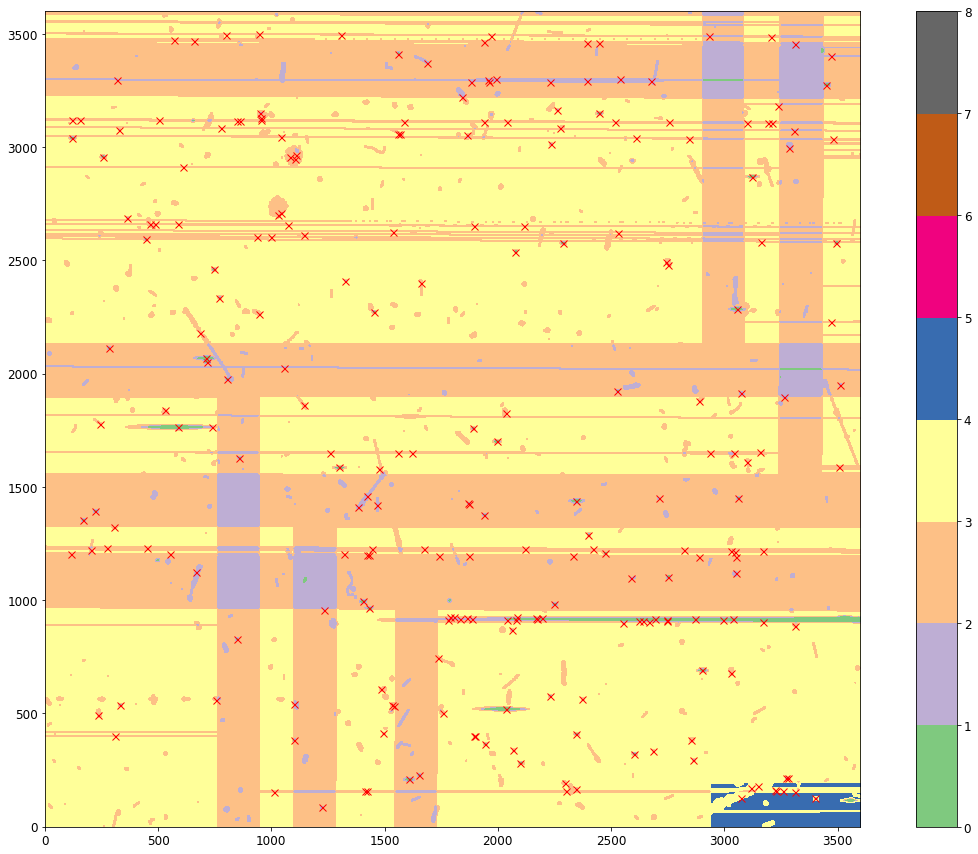

In [17]:
mask = cat['nobs_z']!=n_z

plt.figure(figsize=(20, 15))
plt.imshow(nexp_z, origin='lower', vmin=0, vmax=8, cmap='Accent')
plt.plot(bx[mask], by[mask], 'x', color='r', ms=7)
plt.colorbar()
plt.show()

----------
# Check more bricks

In [3]:
bricks = Table(fitsio.read('/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/randoms/survey-bricks-dr9-randoms-0.48.0.fits'))
print(len(bricks))

field = 'north'
bb1 = Table(fitsio.read('/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/survey-bricks-dr9-{}.fits.gz'.format(field, field)))
field = 'south'
bb2 = Table(fitsio.read('/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/survey-bricks-dr9-{}.fits.gz'.format(field, field)))
bb = vstack(bb1, bb2)

mask = (bb['nexp_g']>0) & (bb['nexp_r']>0) & (bb['nexp_z']>0)
bb = bb[mask]
mask = np.in1d(bricks['BRICKID'], bb['brickid'])
bricks = bricks[mask]
print(len(bricks))

662174
83619


In [4]:
np.random.seed(1233)
idx = np.random.choice(len(bricks), size=200, replace=False)
bricks = bricks[idx]
print(len(bricks))

200


In [5]:
catcat_stack = []

for index in range(len(bricks)):
    if bricks['PHOTSYS'][index]=='S':
        field = 'south'
    else:
        field = 'north'
    brickname = bricks['BRICKNAME'][index]
    
    tractor_fn = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/tractor/{}/tractor-{}.fits'.format(field, brickname[:3], brickname, brickname)
    # if not os.path.isfile(tractor_fn):
    #     print(index, brickname, 0)
    #     continue
    cat = Table(fitsio.read(tractor_fn))

    ra, dec = cat['ra'], cat['dec']
    bx, by = cat['bx'].copy(), cat['by'].copy()

    bx, by = np.round(bx).astype(int), np.round(by).astype(int)
    
    nexp_g_fn = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/coadd/{}/{}/legacysurvey-{}-nexp-g.fits.fz'.format(field, brickname[:3], brickname, brickname)
    nexp_r_fn = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/coadd/{}/{}/legacysurvey-{}-nexp-r.fits.fz'.format(field, brickname[:3], brickname, brickname)
    nexp_z_fn = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/coadd/{}/{}/legacysurvey-{}-nexp-z.fits.fz'.format(field, brickname[:3], brickname, brickname)
    maskbits_fn = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/{}/coadd/{}/{}/legacysurvey-{}-maskbits.fits.fz'.format(field, brickname[:3], brickname, brickname)
    
    nexp_g = fitsio.read(nexp_g_fn)
    nexp_r = fitsio.read(nexp_r_fn)
    nexp_z = fitsio.read(nexp_z_fn)
    maskbits = fitsio.read(maskbits_fn)

    cat['n_g'], cat['n_r'], cat['n_z'] = nexp_g[by, bx], nexp_r[by, bx], nexp_z[by, bx]
    cat['mb'] = maskbits[by, bx]
    
    cat_stack.append(cat)
    
    print(index, brickname, len(cat))

cat = vstack(cat_stack)

0 1724p422 4285
1 1375p717 3402
2 2907p522 8079
3 1437p555 3584
4 2273p400 3625
5 1625p605 3711
6 2227p562 3494
7 1754p422 4607
8 2539p682 3843
9 1858p765 3257
10 2058p787 4378
11 2486p517 4239
12 2114p497 4052
13 1806p537 3327
14 1738p700 3571
15 2757p542 6002
16 2427p432 4098
17 1914p392 4062
18 2497p755 3993
19 2493p700 3675
20 1126p475 3851
21 1027p497 4874
22 2756p412 6457
23 1137p400 4861
24 1052p352 5796
25 1776p367 3826
26 1603p337 4257
27 2201p410 3879
28 1253p660 3424
29 1955p432 3273
30 1570p360 3849
31 2902p542 7002
32 2495p410 4132
33 1531p337 3884
34 1612p627 3503
35 1532p397 3416
36 2991p650 5572
37 1184p792 4345
38 0923p685 4029
39 1975p325 4154
40 1223p467 3837
41 2842p572 5850
42 2017p382 3680
43 0974p395 4597
44 2075p455 3335
45 1999p397 3613
46 1919p325 3857
47 1720p477 3058
48 1252p590 3560
49 2335p732 3238
50 2253p662 4014
51 2529p522 5055
52 2407p542 4099
53 1775p487 3157
54 2760p367 7192
55 2273p567 3618
56 2726p525 5354
57 2705p492 4605
58 2436p490 4253
59 1813

In [36]:
cat

release,brickid,brickname,objid,brick_primary,maskbits,fitbits,type,ra,dec,ra_ivar,dec_ivar,bx,by,dchisq [5],ebv,mjd_min,mjd_max,ref_cat,ref_id,pmra,pmdec,parallax,pmra_ivar,pmdec_ivar,parallax_ivar,ref_epoch,gaia_phot_g_mean_mag,gaia_phot_g_mean_flux_over_error,gaia_phot_g_n_obs,gaia_phot_bp_mean_mag,gaia_phot_bp_mean_flux_over_error,gaia_phot_bp_n_obs,gaia_phot_rp_mean_mag,gaia_phot_rp_mean_flux_over_error,gaia_phot_rp_n_obs,gaia_phot_variable_flag,gaia_astrometric_excess_noise,gaia_astrometric_excess_noise_sig,gaia_astrometric_n_obs_al,gaia_astrometric_n_good_obs_al,gaia_astrometric_weight_al,gaia_duplicated_source,gaia_a_g_val,gaia_e_bp_min_rp_val,gaia_phot_bp_rp_excess_factor,gaia_astrometric_sigma5d_max,gaia_astrometric_params_solved,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,fiberflux_g,fiberflux_r,fiberflux_z,fibertotflux_g,fibertotflux_r,fibertotflux_z,apflux_g [8],apflux_r [8],apflux_z [8],apflux_resid_g [8],apflux_resid_r [8],apflux_resid_z [8],apflux_blobresid_g [8],apflux_blobresid_r [8],apflux_blobresid_z [8],apflux_ivar_g [8],apflux_ivar_r [8],apflux_ivar_z [8],apflux_masked_g [8],apflux_masked_r [8],apflux_masked_z [8],apflux_w1 [5],apflux_w2 [5],apflux_w3 [5],apflux_w4 [5],apflux_resid_w1 [5],apflux_resid_w2 [5],apflux_resid_w3 [5],apflux_resid_w4 [5],apflux_ivar_w1 [5],apflux_ivar_w2 [5],apflux_ivar_w3 [5],apflux_ivar_w4 [5],mw_transmission_g,mw_transmission_r,mw_transmission_z,mw_transmission_w1,mw_transmission_w2,mw_transmission_w3,mw_transmission_w4,nobs_g,nobs_r,nobs_z,nobs_w1,nobs_w2,nobs_w3,nobs_w4,rchisq_g,rchisq_r,rchisq_z,rchisq_w1,rchisq_w2,rchisq_w3,rchisq_w4,fracflux_g,fracflux_r,fracflux_z,fracflux_w1,fracflux_w2,fracflux_w3,fracflux_w4,fracmasked_g,fracmasked_r,fracmasked_z,fracin_g,fracin_r,fracin_z,anymask_g,anymask_r,anymask_z,allmask_g,allmask_r,allmask_z,wisemask_w1,wisemask_w2,psfsize_g,psfsize_r,psfsize_z,psfdepth_g,psfdepth_r,psfdepth_z,galdepth_g,galdepth_r,galdepth_z,nea_g,nea_r,nea_z,blob_nea_g,blob_nea_r,blob_nea_z,psfdepth_w1,psfdepth_w2,psfdepth_w3,psfdepth_w4,wise_coadd_id,wise_x,wise_y,lc_flux_w1 [15],lc_flux_w2 [15],lc_flux_ivar_w1 [15],lc_flux_ivar_w2 [15],lc_nobs_w1 [15],lc_nobs_w2 [15],lc_fracflux_w1 [15],lc_fracflux_w2 [15],lc_rchisq_w1 [15],lc_rchisq_w2 [15],lc_mjd_w1 [15],lc_mjd_w2 [15],lc_epoch_index_w1 [15],lc_epoch_index_w2 [15],sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,n_g,n_r,n_z,mb
int16,int32,str8,int32,bool,int16,int16,str3,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,str2,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,float32,float32,int16,bool,float32,float32,int16,int16,float32,bool,float32,float32,float32,float32,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float64,float64,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16
9011,553312,1724p422,0,False,1,0,PSF,172.25939415886347,42.32599689449026,82735860000

In [6]:
mask = cat['nobs_g']<cat['n_g']
print(np.sum(mask), np.sum(mask)/len(mask))
mask = cat['nobs_g']>cat['n_g']
print(np.sum(mask), np.sum(mask)/len(mask))

mask = cat['nobs_r']<cat['n_r']
print(np.sum(mask), np.sum(mask)/len(mask))
mask = cat['nobs_r']>cat['n_r']
print(np.sum(mask), np.sum(mask)/len(mask))

mask = cat['nobs_z']<cat['n_z']
print(np.sum(mask), np.sum(mask)/len(mask))
mask = cat['nobs_z']>cat['n_z']
print(np.sum(mask), np.sum(mask)/len(mask))

0 0.0
26833 0.031269482975011684
0 0.0
37219 0.04337267122002608
0 0.0
55286 0.06442681160349181


In [7]:
mask = cat['maskbits']!=cat['mb']
print(np.sum(mask), np.sum(mask)/len(mask))

0 0.0


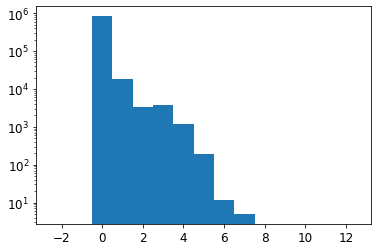

In [33]:
plt.hist(cat['nobs_g']-cat['n_g'], bins=np.linspace(-2.5, 12.5, 16), log=True);

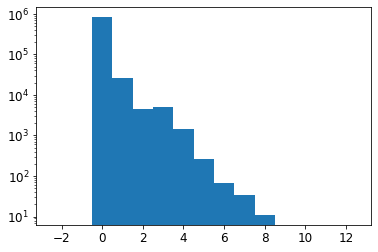

In [34]:
plt.hist(cat['nobs_r']-cat['n_r'], bins=np.linspace(-2.5, 12.5, 16), log=True);

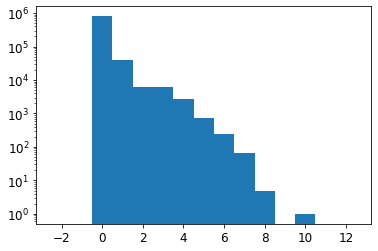

In [35]:
plt.hist(cat['nobs_z']-cat['n_z'], bins=np.linspace(-2.5, 12.5, 16), log=True);